In [3]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import missingno as msno
pd.options.display.max_rows= 10000
pd.options.display.max_columns= None
pd.options.display.width= 1000
# import data set
# Load data set

df = pd.read_csv("D:\MSDA\medical_clean.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [68]:
# change all yes/no 
df.replace({'Yes':1,
                  'No':0}, inplace=True)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df.head()

CaseOrder Customer_id                           Interaction                               UID          City State        County    Zip       Lat       Lng  Population      Area          TimeZone                               Job  Children  Age    Income   Marital  Gender ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  vitD_supp Soft_drink        Initial_admin HighBlood Stroke Complication_risk Overweight Arthritis Diabetes Hyperlipidemia BackPain Anxiety Allergic_rhinitis Reflux_esophagitis Asthma     Services  Initial_days  TotalCharge  Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621  34.34960 -86.72508        2951  Suburban   America/Chicago  Psychologist, sport and exercise         1   53  86575.93  Divorced    Male      No    19.141466           6                 0          0         No  Emergency Admission       Yes     No            Medium         No       Yes      Yes             No      Yes     Yes               Yes                 No    Yes   Blood Work     10.585770  3726.702860        17939.403420      3      3      2      2      4      3      3      4
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446  30.84513 -85.22907       11303     Urban   America/Chicago      Community development worker         3   51  46805.99   Married  Female      No    18.940352           4                 2          1         No  Emergency Admission       Yes     No              High        Yes        No       No             No       No      No                No                Yes     No  Intravenous     15.129562  4193.190458        17612.998120      3      4      3      4      4      4      3      3
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110  43.54321 -96.63772       17125  Suburban   America/Chicago           Chief Executive Officer         3   53  14370.14   Widowed  Female      No    18.057507           4                 1          0         No   Elective Admission       Yes     No            Medium        Yes        No      Yes             No       No      No                No                 No     No   Blood Work      4.772177  2434.234222        17505.192460      2      4      4      4      3      4      3      3
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072  43.89744 -93.51479        2162  Suburban   America/Chicago               Early years teacher         0   78  39741.49   Married    Male      No    16.576858           4                 1          0         No   Elective Admission        No    Yes            Medium         No       Yes       No             No       No      No                No                Yes    Yes   Blood Work      1.714879  2127.830423        12993.437350      3      5      5      3      4      5      5      5
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181  37.59894 -76.88958        5287     Rural  America/New_York       Health promotion specialist         1   22   1209.56   Widowed  Female      No    17.439069           5                 0          2        Yes   Elective Admission        No     No               Low         No        No       No            Yes       No      No               Yes                 No     No      CT Scan      1.254807  2113.073274         3716.525786      2      1      3      3      5      3      4      3

In [76]:
df2 = df[['Children','Age', 'Income','VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge']].copy()
df2.describe()

Children           Age         Income   VitD_levels    Doc_visits  Full_meals_eaten     vitD_supp  Initial_days   TotalCharge
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000      10000.000000  10000.000000  10000.000000  10000.000000
mean       2.097200     53.511700   40490.495160     17.964262      5.012200          1.001400      0.398900     34.455299   5312.172769
std        2.163659     20.638538   28521.153293      2.017231      1.045734          1.008117      0.628505     26.309341   2180.393838
min        0.000000     18.000000     154.080000      9.806483      1.000000          0.000000      0.000000      1.001981   1938.312067
25%        0.000000     36.000000   19598.775000     16.626439      4.000000          0.000000      0.000000      7.896215   3179.374015
50%        1.000000     53.000000   33768.420000     17.951122      5.000000          1.000000      0.000000     35.836244   5213.952000
75%        3.000000     71.000000   54296.402500     19.347963      6.000000          2.000000      1.000000     61.161020   7459.699750
max       10.000000     89.000000  207249.100000     26.394449      9.000000          7.000000      5.000000     71.981490   9180.728000

In [78]:
#standardize all variables
#code from Data Camp: Unsupervised Learning in Python

scaler = StandardScaler()
scaler.fit(df2)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled = scaler.transform(df2)
print(scaled)
scaledDF=pd.DataFrame(scaled)
scaledDF.to_csv('D:\MSDA\scaledDF.csv')

[[-0.50712929 -0.02479466  1.61591429 ... -0.63471264 -0.9073098
  -0.72718477]
 [ 0.417277   -0.1217056   0.22144303 ...  0.95644465 -0.73459473
  -0.51322759]
 [ 0.417277   -0.02479466 -0.91586974 ... -0.63471264 -1.12829151
  -1.31998284]
 ...
 [ 0.417277   -0.4124384   0.89156936 ... -0.63471264  1.3569578
   1.35959679]
 [ 0.417277   -0.50934933 -0.37827063 ...  0.95644465  1.09858493
   1.06972732]
 [ 2.72829274  0.79894828  0.77813279 ...  0.95644465  1.38342919
   1.18121275]]


<AxesSubplot:>

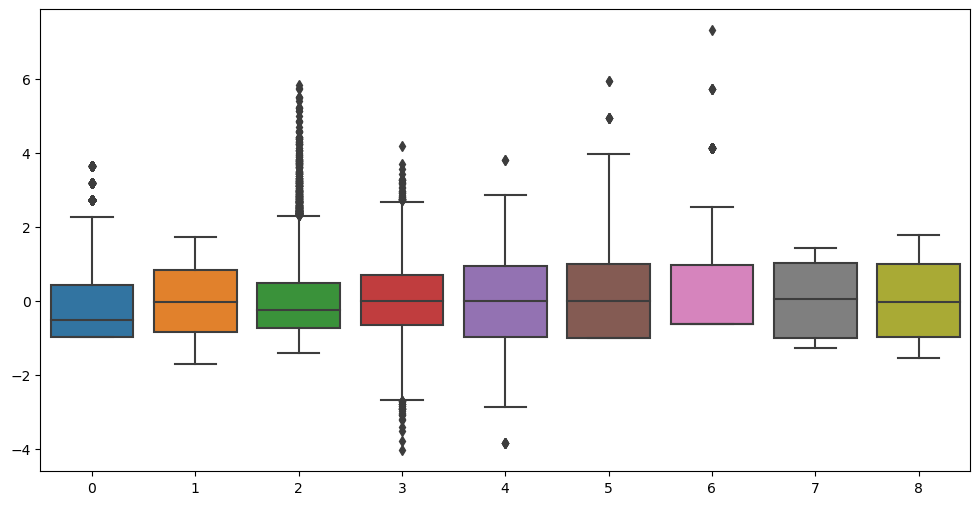

In [79]:
sns.boxplot(data=scaledDF)

In [10]:
from scipy.stats.mstats import winsorize

In [80]:
df2['Income']= winsorize(df2['Income'], limits=[0.05, 0.05])

<AxesSubplot:xlabel='Income'>

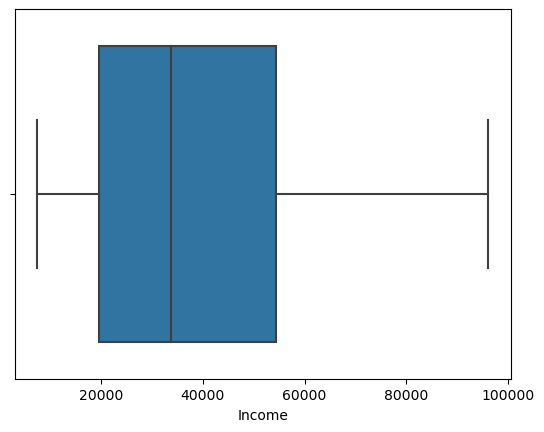

In [14]:
sns.boxplot('Income', data=df2)

In [81]:
df2['Children']= winsorize(df2['Children'], limits=[0.05, 0.05])

In [82]:
df2['VitD_levels']= winsorize(df2['VitD_levels'], limits=[0.05, 0.05])

In [83]:
df2['Doc_visits']= winsorize(df2['Doc_visits'], limits=[0.05, 0.05])

In [84]:
df2['Full_meals_eaten']= winsorize(df2['Full_meals_eaten'], limits=[0.05, 0.05])

In [85]:
df2['vitD_supp']= winsorize(df2['vitD_supp'], limits=[0.05, 0.05])

In [22]:
df2['Additional_charges']= winsorize(df2['Additional_charges'], limits=[0.05, 0.05])

In [86]:
scaler = StandardScaler()
scaler.fit(df2)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled = scaler.transform(df2)
print(scaled)
scaledDF=pd.DataFrame(scaled)
scaledDF.to_csv('D:\MSDA\scaledDF.csv')

[[-0.52424347 -0.02479466  1.89788173 ... -0.65113009 -0.9073098
  -0.72718477]
 [ 0.49717585 -0.1217056   0.29650512 ...  1.01331288 -0.73459473
  -0.51322759]
 [ 0.49717585 -0.02479466 -1.00955699 ... -0.65113009 -1.12829151
  -1.31998284]
 ...
 [ 0.49717585 -0.4124384   1.06606176 ... -0.65113009  1.3569578
   1.35959679]
 [ 0.49717585 -0.50934933 -0.39219135 ...  1.01331288  1.09858493
   1.06972732]
 [ 2.5400145   0.79894828  0.93579399 ...  1.01331288  1.38342919
   1.18121275]]


<AxesSubplot:>

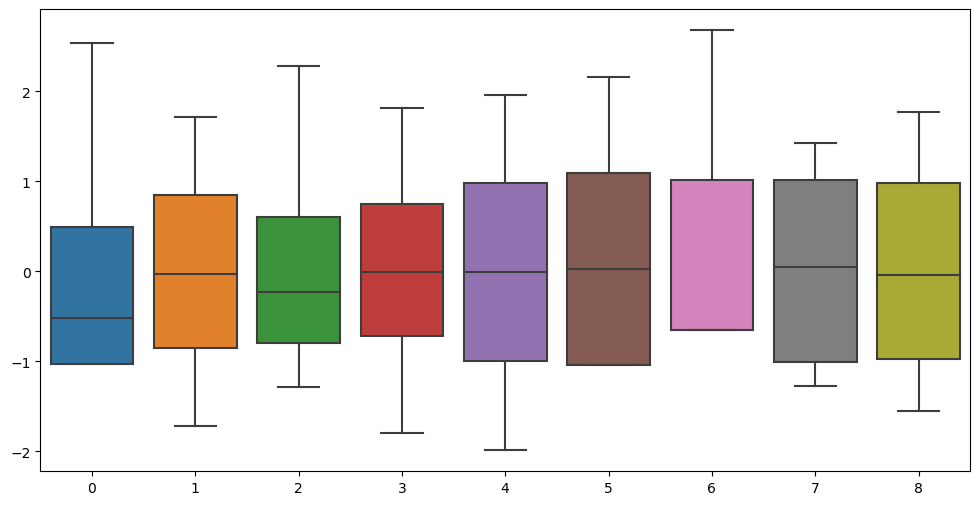

In [87]:
sns.boxplot(data=scaledDF)

In [89]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(scaledDF)


loadings = pd.DataFrame(data=principalComponents,
                       columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
loadings

PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9
0    -1.210932  0.914662  0.818763  1.390784 -0.943052  0.110917 -0.391521 -1.455067  0.131115
1    -0.864442 -0.517690 -0.171254 -0.221581  0.528793 -0.095260  1.801060  0.009837  0.153314
2    -1.705283 -0.773231 -0.903811 -0.353187  0.980276 -0.306964 -0.433892  0.038986 -0.135899
3    -1.922759 -0.004570 -0.581420 -0.862214  0.317705  1.591827 -0.535581 -0.654617 -0.149276
4    -1.855918  1.587084  0.230813 -2.117925 -0.183966 -2.087593  0.758361  0.919942 -0.145331
5    -1.626030  0.254504  1.640753  1.528132  0.172901  0.331051 -0.515737 -1.469429 -0.100099
6    -1.216090  1.091171 -0.290534 -0.784400 -0.579078  0.265280 -2.141767  1.022649  0.162394
7    -1.279908 -1.467822  1.108606  2.448908  0.244230 -1.198798  0.073686  1.535605 -0.207167
8    -1.647468 -1.395569  0.012085  0.779134 -2.059770  0.743850  0.798066  0.179244 -0.005026
9    -1.493991  0.558276  3.089559 -1.042477 -0.360949 -0.085751  0.867641  0.948970  0.175095
10   -1.695165 -1.284575  0.110142  1.225040 -0.117012  0.828820  0.384171  1.766978  0.048307
11   -1.498532 -2.044979  0.814307  0.128910 -1.637755  0.677831 -0.383172  1.521631  0.032039
12   -1.656679 -0.750410 -0.607042 -1.333550 -1.137964  0.325659  1.242359  1.603194  0.047889
13   -1.573902  0.435100 -0.414845 -0.148058 -0.206283 -0.482305 -1.037517 -0.505642  0.185657
14   -1.694318 -0.319361  0.287777 -1.335889  0.594973  1.616130  1.119762  0.006050  0.068152
15   -1.907028  1.481977 -0.936965  0.943035  0.205052  1.891766  0.506331 -0.859812 -0.101430
16   -1.391662  0.077673  0.453909  0.468935  1.976473 -1.203924  0.638392  1.542200 -0.034269
17   -1.725437 -1.023636 -1.331794 -0.964605 -0.361618  0.659238 -0.021450  0.071499  0.062962
18   -1.598701 -0.018259  2.051413  0.226569 -1.285734  0.973453  0.751141  0.680547 -0.121880
19   -1.197884  1.689184  2.234686 -1.443366 -0.399075  1.394220  1.157173  0.519973  0.050126
20   -1.208685 -1.033875  2.506290 -2.006745  0.010134 -0.070404  1.281067  1.071624  0.149652
21   -1.403188 -0.377704  0.175734  0.368919  0.512625 -0.314256 -1.215509  1.507041  0.116120
22   -1.411901  1.199716  1.124836 -1.151066 -1.044654 -1.997453  1.872102 -1.337224  0.213022
23   -1.151952  0.151705 -0.153672  0.840486 -0.255833 -0.409508 -0.727077  1.037226  0.094976
24   -0.816143  0.448332 -1.672475 -0.445356 -1.056396 -0.528035 -0.770970  0.859093  0.092888
25   -1.328849 -0.115181  0.213877 -0.107787 -0.461200  1.255819 -0.411807 -0.919879  0.193628
26   -1.484138  1.264052  0.125105  0.333724 -0.989235  0.298683 -1.200710 -0.257742  0.021642
27   -0.750280  0.852127 -0.807312  0.273925  1.367504  1.048050  0.099091 -2.006427  0.126390
28   -1.020872  0.299387  0.705331 -0.113848  0.205396  0.206976 -1.770201  0.277939  0.076298
29   -1.244131 -0.623562  0.237270  1.189487  0.625347  0.461302 -0.325604  1.819605  0.042638
30   -1.197818  2.159814  1.042067  0.656814 -1.344211 -0.072149  0.745483 -1.025999  0.036293
31   -1.624952 -0.120521 -1.035665  0.129318  0.694299 -1.527081 -0.456697 -0.809908 -0.080958
32   -0.634391 -1.893031 -1.636798  0.243547 -1.591010 -0.285700  1.590006 -0.710481 -0.053597
33   -1.463206 -0.871121  0.224862 -0.622451  0.561393  0.599884 -1.055013  0.138699  0.026812
34   -1.392534 -0.321690  0.197345 -0.582075  1.253647  0.595166 -0.924584 -1.412109 -0.167907
35   -1.281718 -0.638104 -0.318129 -1.019485  0.015539 -0.377112 -0.812856 -1.885572 -0.110985
36   -1.919278  1.074370 -0.766236  1.710865 -1.094451  0.107812  0.772448 -0.976437 -0.144166
37   -1.205817 -0.373769  0.477719 -0.519527 -0.534806 -0.862173 -1.737621 -0.112034 -0.017577
38   -1.076346 -0.570003  0.934338  0.482341 -0.429238 -0.393749 -1.445237  1.361390  0.041404
39   -1.379898 -0.218443  0.890357 -0.101466  0.573254 -0.273102 -1.814959  0.336765 -0.146158
40   -1.612317 -0.485692 -0.141748 -0.712083  1.576281  1.183817  1.891548 -0.515093  0.024565
41   -1.183122  0.221

In [90]:
load = pd.DataFrame(pca.components_.T,
                       columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'],
                        index = df2.columns)
load

PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9
Children          0.031803 -0.141971  0.164645  0.499837  0.728542 -0.272299  0.097819  0.295631 -0.000994
Age               0.024124 -0.267589  0.537771 -0.242789  0.338348  0.618985 -0.176986 -0.225220 -0.000362
Income           -0.018965  0.414743  0.115970  0.590434 -0.111176  0.339734  0.411146 -0.410786  0.001322
VitD_levels      -0.003290 -0.560988  0.248962  0.060664 -0.185642 -0.481678  0.195561 -0.561156 -0.001729
Doc_visits       -0.007617  0.039638  0.630787  0.301045 -0.493952 -0.085903 -0.312425  0.401088 -0.001067
Full_meals_eaten -0.023001 -0.556135 -0.164712  0.097626 -0.239934  0.377579  0.518518  0.429563 -0.002217
vitD_supp         0.027984  0.332617  0.427264 -0.488243  0.065724 -0.212540  0.620763  0.181127 -0.000869
Initial_days      0.705918 -0.001526 -0.019438  0.013963 -0.031762  0.009441  0.000421 -0.005000 -0.707093
TotalCharge       0.705936 -0.005285 -0.017578  0.013745 -0.032227  0.008356  0.002093 -0.003129  0.707111

In [91]:
var= pca.explained_variance_ratio_*100
vardf= pd.DataFrame(var.round(2), columns=['Captured Variance per PC'],
    index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
vardf

Captured Variance per PC
PC1                     22.12
PC2                     11.66
PC3                     11.32
PC4                     11.23
PC5                     11.11
PC6                     10.89
PC7                     10.82
PC8                     10.72
PC9                      0.14

<AxesSubplot:>

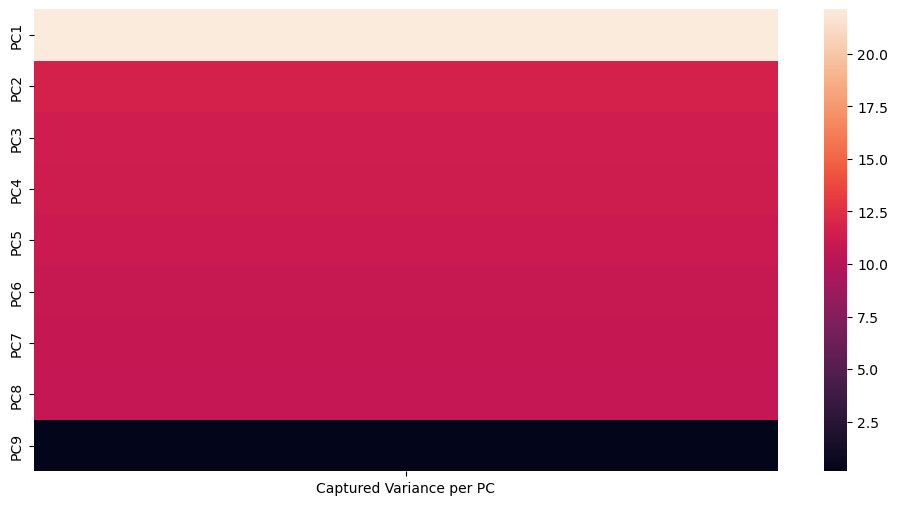

In [92]:
sns.heatmap(vardf)

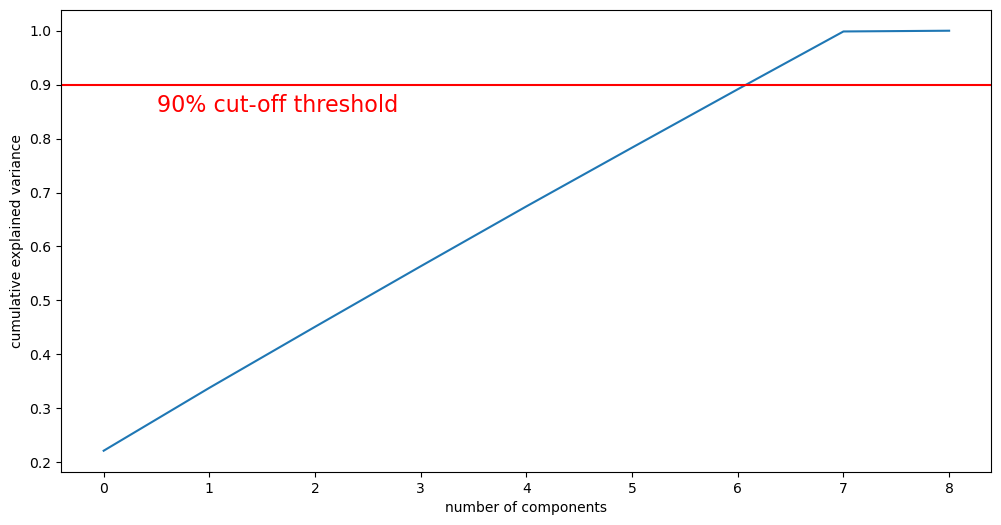

In [93]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
plt.show()

In [96]:
from numpy.linalg import eig
cov_matrix = np.cov(loadings.T)

# Calculate Eigenvalues and Eigenmatrix

eigenvalues, eigenvectors = eig(cov_matrix)
print(cov_matrix)

[[ 1.99113059e+00 -7.68795302e-17 -4.99650326e-18 -6.65478718e-17
   5.11641934e-17  4.68255631e-17 -4.90323520e-17 -2.21128579e-16
  -1.45453762e-18]
 [-7.68795302e-17  1.04951164e+00 -2.86022053e-17 -3.83731450e-17
   2.26152841e-16  3.00678463e-17 -2.20245864e-16  1.62097669e-16
  -1.56224002e-17]
 [-4.99650326e-18 -2.86022053e-17  1.01890312e+00 -3.62901584e-16
  -2.01459011e-16  6.66200435e-18 -4.89079946e-16 -1.38125557e-17
   1.72545913e-17]
 [-6.65478718e-17 -3.83731450e-17 -3.62901584e-16  1.01036944e+00
  -1.00374199e-16  1.41545386e-16  1.39102651e-16  2.36678808e-16
   1.59888104e-18]
 [ 5.11641934e-17  2.26152841e-16 -2.01459011e-16 -1.00374199e-16
   9.99605535e-01  5.52502227e-17 -8.88267246e-19 -2.72209498e-16
  -2.55376833e-18]
 [ 4.68255631e-17  3.00678463e-17  6.66200435e-18  1.41545386e-16
   5.52502227e-17  9.80588569e-01  4.94254103e-16  5.34070682e-16
   1.06036903e-18]
 [-4.90323520e-17 -2.20245864e-16 -4.89079946e-16  1.39102651e-16
  -8.88267246e-19  4.9425410

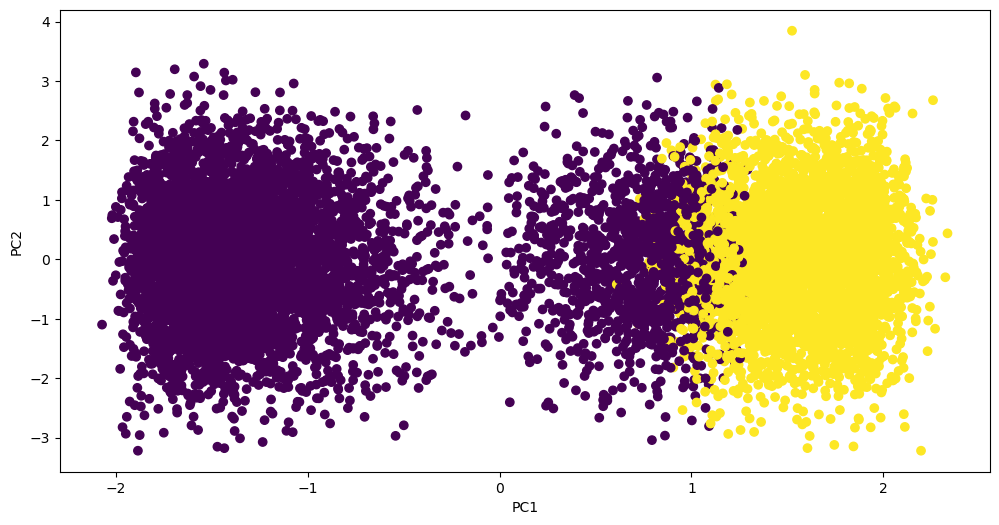

In [94]:
pca = PCA()
x_new = pca.fit_transform(scaledDF)

plt.scatter(x_new[:,0], x_new[:,1], c = df['ReAdmis'])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

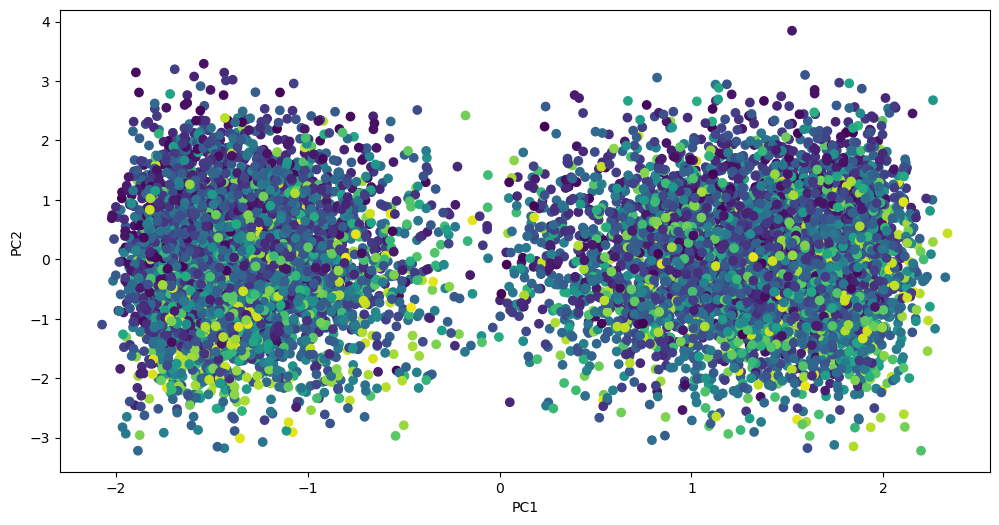

In [95]:
pca = PCA()
x_new = pca.fit_transform(scaledDF)

plt.scatter(x_new[:,0], x_new[:,1], c = df['Additional_charges'])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()